<h1 style="font-size:3rem;color:rgb(0, 91, 94);text-align:center;">Topic 1 - Statistics</h1>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

### Overview
Below is a general overview of this topic: 

Firstly, through the lens of the "Lady Tasting Tea" problem (outlined extensively in the topic notebook) we are introduced to the 'itertools' python module, a module which when imported allows for the use of a standardised core set of fast, memory efficient tools related to a form of “iterator algebra” inspired by constructs from APL, Haskell, and SML (itertools - Python documentation website). We are also introducted to the concept of the Null and Alternative Hypothesis in this section, with Null hypithesis typically indicating a variable/predictor to have no effect on a population or outcome, with the Alternative Hypothesis typically indicating the opposite (Turney, 2022).

In the second half of this topic, we are introduced to conducting t-tests in python, as well as information regarding Type 1 and Type 2 errors, and conducting multiple t-tests. T-tests are hypothesis tests which use sample data (i.e. group means) to infer properties about a whole population (Frost, 2019).

Type 1 errors occur when a Null Hypothesis is incorrectly rejected when it should be accepted, while Type 2 errors occur when a Null Hypothesis is incorrectly accepted when it should be rejected (Bhandari, 2021). When conducting multiple t-tests you increase the chance of encountering a Type 1 error (One-way ANOVA - Laerd.com), therefore an ANOVA test is used, as it is also a statistical technique used to compare differences in means across populations, while allowing a user to test more than two levels within an independent variable (ANOVA test, 2022).


### References:
itertools — Functions creating iterators for efficient looping. Python documentation website: https://docs.python.org/3/library/itertools.html

Turney, S. (2022, May 6). Null and Alternative Hypotheses | Definitions & Examples. Scribbr website: https://www.scribbr.com/statistics/null-and-alternative-hypotheses/#:~:text=What%20are%20null%20and%20alternative,of%20an%20effect%20or%20relationship.

Frost, J. (2019, September 16). How to do t-Tests in Excel. Statistics By Jim website: https://statisticsbyjim.com/hypothesis-testing/t-tests-excel/

Bhandari, P. (2021, January 18). Type I & Type II Errors | Differences, Examples, Visualizations. Scribbr website: https://www.scribbr.com/statistics/type-i-and-type-ii-errors/#:~:text=A%20Type%20I%20error%20means,alpha%20or%20%CE%B1)%20you%20choose.

One-way ANOVA - Its preference to multiple t-tests and the assumptions needed to run this test | Laerd Statistics. (2018). Laerd.com website: https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php#:~:text=Every%20time%20you%20conduct%20a,a%20mistake%22%20to%2010%25.

ANOVA test (2022). Simplypsychology.org website: https://www.simplypsychology.org/anova.html#:~:text=What%20is%20an%20ANOVA%3F,into%202%20or%20more%20groups.

<h2 style="color:rgb(0, 91, 94)">Exercise 1</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

**Question**: Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.

10 cups of tea (5 cups with milk in them first, 5 cups with tea in them first) would be the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%, while maintaining equal numbers in both groups.

With 10 cups of tea split 50/50 the probability of randomly selecting the correct cups is 0.003968253968253968 (or ~0.4%)

In [26]:
import itertools

# Number of cups of tea
x = 10
# Split of the group sizes
split = 5

# Creates a list the length of 'x'
cups = list(range(x))

# Using the itertools module, creates a list of all possible combinations of outcomes for the tasting experiment
poss = list(itertools.combinations(cups, split))
possibilities = len(poss)

# Calculates the probability of randomly selecting the correct 5 cups.
chance = 1/possibilities
print(f"When {x} cups of tea are used, the probability of randomly selecting the correct {split} cups is: {chance} or {round(chance*100, 1)}%")

When 10 cups of tea are used, the probability of randomly selecting the correct 5 cups is: 0.003968253968253968 or 0.4%


**Bonus Question**: How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?

16 cups of tea (8 cups with milk in them first, 8 cups with tea in them first) would be the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%, while maintaining equal numbers in both groups and allowing the taster to select one wrong cup.

Number of possible outcomes: 12870
Number of outcomes with correct output: 1
Number of outcomes with one mistake allowed: 64
Probability = 65 / 12870
When 16 cups of tea are used, the probability of randomly selecting the correct 8 cups (allowing for 1 mistake) is: 0.005050505050505051 or 0.5%


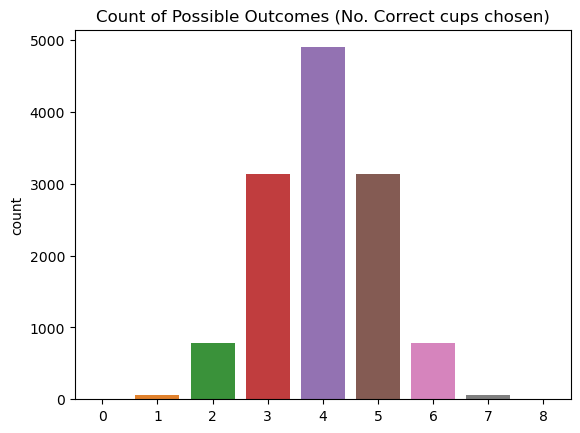

In [27]:
import itertools
import random
import seaborn as sns

# Number of cups of tea
x = 16
# Split of the group sizes
split = 8

# Creates a list the length of 'x'
cups = list(range(x))

# Creates a list of all possible outcome combinations using 'itertools.combination' module
poss = list(itertools.combinations(cups, split))
possibilities = len(poss)
print(f"Number of possible outcomes: {possibilities}")


# Pick a random correct answer from the list of outcomes to simulate the experiment.
milkfirst = set(random.choice(poss))

# Count the overlap between the correct answer, and each of the possible outcomes.
counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, split)]

almost_right = []
for i in counts:
    if i == split - 1:
        almost_right.append(i)
# Calculate the number of outcomes where the participant almost got the correct outcome + the one instance of achieving the correct outcome
chance = len(almost_right) + 1
print(f"Number of outcomes with correct output: 1")
print(f"Number of outcomes with one mistake allowed: {len(almost_right)}")
print(f"Probability = {chance} / {possibilities}")

# Creat the plot.
sns.countplot(x=counts).set(title='Count of Possible Outcomes (No. Correct cups chosen)')# (https://www.statology.org/seaborn-title/)

# Calculates the probability of randomly selecting the correct 8 cups, allowing for one mistake to be made.
probability = chance/possibilities
print(f"When {x} cups of tea are used, the probability of randomly selecting the correct {split} cups (allowing for 1 mistake) is: {probability} or {round(probability*100, 1)}%")

<h2 style="color:rgb(0, 91, 94)">Exercise 2</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

**Question**: Use scipy's version of Fisher's exact test to simulate the Lady Tasting Tea problem.

|                  | Milk First | Tea First |
|------------------|------------|-----------|
| Guess Milk First | 4          | 0         |
| Guess Tea First  | 0          | 4         |

https://tableconvert.com/markdown-generator


scipy.stats.fisher_exact is used to simulate the "Lady Tasting Tea" problem. The above diagram shows the table which will be input in fisher_exact, indicating the range of possible outcomes from the experiment. The 'alternative='greater'' parameter is used to simulate the problem. "The one-sided p-value for alternative='greater' is the probability that a random table has x >= a". In our example 'a' can be interpreted as 4 (the value at the top left of the table above).

Reference:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html

In [28]:
import scipy.stats as ss

# Simulates the "Lady Tasting Tea" problem using scipy.stats.fisher_exact, as outline above.
oddsr, p = ss.fisher_exact([[4, 0], [0, 4]], alternative='greater')
print(p)

0.014285714285714284


<h2 style="color:rgb(0, 91, 94)">Exercise 3</h2>
<hr style=\"border-top: 1px solid rgb(0, 91, 94);\" />

**Question**: Take the code from the Examples section of the scipy stats documentation for independent samples t-tests, add it to your own notebook and add explain how it works using MarkDown cells and code comments. Improve it in any way you think it could be improved.

In [29]:
from scipy import stats
import numpy as np
# define a random number generator
rng = np.random.default_rng()

In [30]:
# Here we test the sample with two identical means

# stats.norm.rvs produces a normal continuous random variable.
# The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
# size (size) defines the size of the samplem and random_state pulls from the previously defined random number generator to create a random seed.
rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)

# stats.ttest_ind Calculates the T-test for the means of two independent samples of scores (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
# As parameter 'equal_var' is True by default a standard independent 2 sample test that assumes equal population variances is performed (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
stats.ttest_ind(rvs1, rvs2)

Ttest_indResult(statistic=-0.19603679697537046, pvalue=0.844621273245985)

In [31]:
# As parameter 'equal_var' is set to False a Welch’s t-test, which does not assume equal population variance is performed (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
stats.ttest_ind(rvs1, rvs2, equal_var=False)
# The results of both the above tests are the same as there are equal population variances.

Ttest_indResult(statistic=-0.19603679697537046, pvalue=0.8446215778951321)

In [32]:
# stats.ttest_ind will underestimate p for unequal variances.
# Below, the standard deviation for 'rvs3' has been increased to 20 to show this.
rvs3 = stats.norm.rvs(loc=5, scale=20, size=500, random_state=rng)
stats.ttest_ind(rvs1, rvs3)

Ttest_indResult(statistic=-0.5656618702761093, pvalue=0.5717508108072954)

In [33]:
# Furthermore, when equal_var (equal variance) is explicity not assumed to be True, differences can be seen in the output statictics.
stats.ttest_ind(rvs1, rvs3, equal_var=False)

Ttest_indResult(statistic=-0.5656618702761093, pvalue=0.5718002922274146)

In [34]:
# When n1 != n2, the equal variance t-statistic is no longer equal to the unequal variance t-statistic
# To demonstrate this the size of the sample has been changed to 100 in 'rvs4'.
rvs4 = stats.norm.rvs(loc=5, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs4)

Ttest_indResult(statistic=0.9777513916358107, pvalue=0.3285926681020358)

In [35]:
# As can be seen, when the n values are not equal, the equal variance t-statistic is no longer equal to the unequal variance t-statistic
stats.ttest_ind(rvs1, rvs4, equal_var=False)

Ttest_indResult(statistic=0.5857596571030107, pvalue=0.5592830919242529)

In [36]:
# Finally, a T-test with different means, variance, and n:
rvs5 = stats.norm.rvs(loc=8, scale=20, size=100, random_state=rng)
stats.ttest_ind(rvs1, rvs5)

Ttest_indResult(statistic=-3.8967858588705404, pvalue=0.00010849319164352842)

In [37]:
# As can be seen, building on what was outlined previously, due to the changes in means, variance, and n, the equal variance t-statistic is no longer equal to the unequal variance t-statistic
stats.ttest_ind(rvs1, rvs5, equal_var=False)

Ttest_indResult(statistic=-2.698209708291024, pvalue=0.008054580231270833)

In [38]:
# When performing a permutation test, more permutations typically yields more accurate results (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
# Here, permutations has been set to 10000.
# Permutations is the number of random permutations that will be used to estimate p-values using a permutation test. If permutations equals or exceeds the number of distinct partitions of the pooled data, an exact test is performed instead (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)
stats.ttest_ind(rvs1, rvs5, permutations=10000, random_state=rng)

Ttest_indResult(statistic=-3.8967858588705404, pvalue=0.0001)

In [23]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
# Take these two samples, one of which has an extreme tail.
a = (56, 128.6, 12, 123.8, 64.34, 78, 763.3)
b = (1.1, 2.9, 4.2)
# Use the trim keyword to perform a trimmed (Yuen) t-test. For example, using 20% trimming, trim=.2, the test will reduce the impact of one (np.floor(trim*len(a))) element from each tail of sample a. It will have no effect on sample b because np.floor(trim*len(b)) is 0 (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
# Defines the fraction of elements to be trimmed from each end of the input samples. If 0 (default), no elements will be trimmed from either side. The number of trimmed elements from each tail is the floor of the trim times the number of elements(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html).
stats.ttest_ind(a, b, trim=.2)

Ttest_indResult(statistic=3.4463884028073513, pvalue=0.01369338726499547)